In [1]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
import datetime
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import plotnine
from plotnine import *

In [2]:
str_execute_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
MODEL_PICKLE_FN_NAME = f'extratree-{str_execute_time}.pkl'

In [3]:
# DATA_PATH = '/kaggle/input/tabular-playground-series-feb-2022'
# PICKLE_PATH = '/kaggle/working'
DATA_PATH = '../data'
PICKLE_PATH = '../data'

In [4]:
def draw_bacteria(query="Streptococcus_pyogenes"):
    se_ = train.query('target==@query').drop(['row_id', 'target'], axis=1).sum()
    se_ = (se_ - se_.min()) / (se_.max() - se_.min())
    se_
    plt.figure(figsize=(25, 8))
    se_.sort_values().plot.bar()

def draw_bacteria(se_):
    se_ = (se_ - se_.min()) / (se_.max() - se_.min())
    se_ = se_.sort_values()
    df_ = se_.rename('react').reset_index()
    df_ = df_.rename(columns={'index': 'gene'})
    df_['color'] = 'no-color'
    df_.loc[df_.head(10).index, 'color'] = 'min 10'
    df_.loc[df_.tail(10).index, 'color'] = 'max 10'
    df_.gene = pd.Categorical(df_.gene, categories=df_.gene, ordered=True)
    return ggplot(df_, aes(x='gene', y='react', color='color')) + geom_col() + geom_hline(yintercept=.5)

In [5]:
def make_pkl():
    train = pd.read_csv(f'{DATA_PATH}/train.csv')
    test = pd.read_csv(f'{DATA_PATH}/test.csv')
    with open(f'{PICKLE_PATH}/train.pkl', 'wb') as outf:
        pickle.dump(train, outf)
    with open(f'{PICKLE_PATH}/test.pkl', 'wb') as outf:
        pickle.dump(test, outf)

def read_data():
    with open(f'{PICKLE_PATH}/train.pkl', 'rb') as inpf:
        train = pickle.load(inpf)
    with open(f'{PICKLE_PATH}/test.pkl', 'rb') as inpf:
        test = pickle.load(inpf)
    return train, test

In [6]:
# make_pkl()

In [7]:
train, test = read_data()
train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [8]:
test.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [9]:
train.shape, test.shape

((200000, 288), (100000, 287))

<AxesSubplot:>

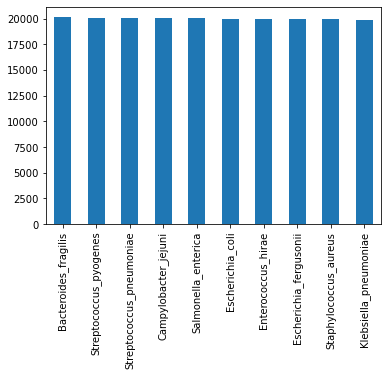

In [10]:
train['target'].value_counts().plot.bar()

In [11]:
train.iloc[0]

row_id                            0
A0T0G0C10              -9.53674e-07
A0T0G1C9               -9.53674e-06
A0T0G2C8               -4.29153e-05
A0T0G3C7               -0.000114441
                      ...          
A9T0G0C1               -9.53674e-06
A9T0G1C0               -9.53674e-06
A9T1G0C0               -9.53674e-06
A10T0G0C0              -9.53674e-07
target       Streptococcus_pyogenes
Name: 0, Length: 288, dtype: object

<BarContainer object of 286 artists>

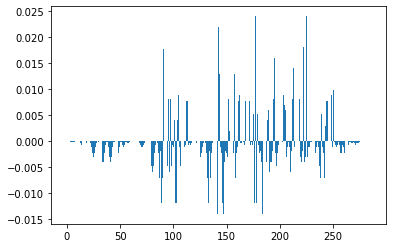

In [12]:
plt.bar(np.arange(len(train.iloc[0, 1:-1])), train.iloc[0, 1:-1].values)

In [13]:
train.target.unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

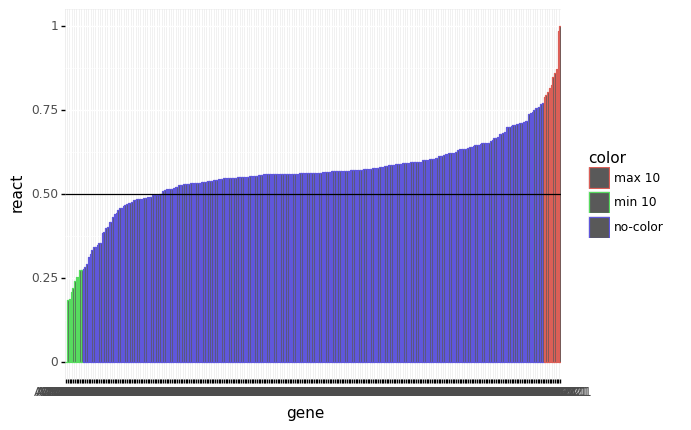

<ggplot: (127898647025)>

In [14]:
se_ = train.query('target=="Streptococcus_pyogenes"').drop(['row_id', 'target'], axis=1).sum()
draw_bacteria(se_)

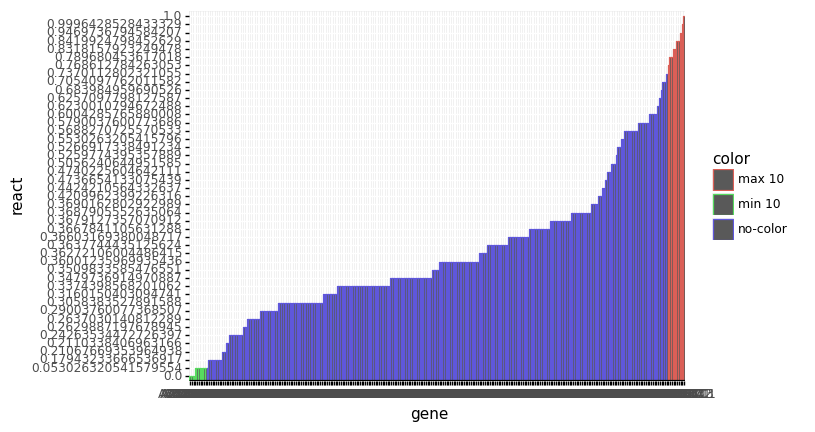

<ggplot: (127896998211)>

In [15]:
draw_bacteria(train.iloc[0, 1:-1])

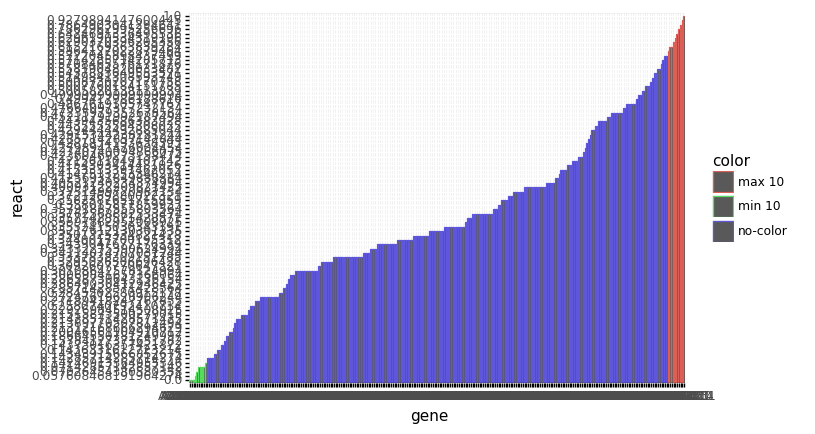

<ggplot: (127899299922)>

In [16]:
draw_bacteria(train.iloc[1, 1:-1])

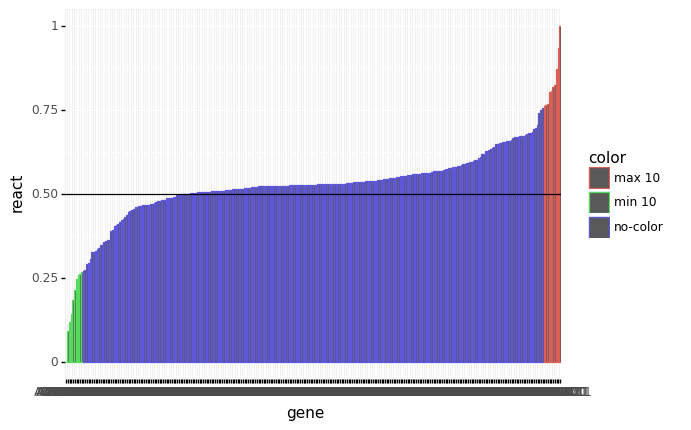

<ggplot: (127881178965)>

In [19]:
se_ = train.iloc[:, 1:-1].sum()
draw_bacteria(se_)

In [29]:
non_duplicate =  ~train.iloc[:, 1:-1].duplicated()
train = train[non_duplicate]
train.shape

(123993, 288)

In [30]:
y = train['target']
X = train.drop(['row_id', 'target'], axis=1)

In [31]:
from sklearn.ensemble import RandomTreesEmbedding

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
emb = RandomTreesEmbedding()
emb.fit(X_train)

RandomTreesEmbedding()

In [34]:
# emb.transform(X_train.iloc[[0]])
emb.apply(X_train.iloc[[0]])

array([[ 5,  5,  6, 15, 12,  5,  6,  5,  5,  5,  5,  6,  5, 12, 34,  5,
         5,  5,  9,  5,  5,  5,  5,  8, 20,  5, 18,  5,  5,  5,  5,  5,
         5,  5,  5,  6,  5,  5,  5,  5, 20,  6,  5,  5, 18, 12,  5,  5,
        21,  5,  5,  5,  8,  5,  5, 12,  5,  5,  5, 12,  5,  5,  5,  5,
        13,  6,  5,  8,  5,  5, 10,  5,  5,  5,  5, 30,  5,  5,  5,  5,
         5, 12,  5,  6,  8,  5,  5,  5,  5,  5,  5,  5, 24,  5,  5,  5,
         5,  6,  5,  5]], dtype=int64)

In [35]:
X_train_emb = emb.transform(X_train)

In [36]:
# model = LogisticRegression()
# model = SVC(kernel='linear')
# model = RandomForestClassifier()
# model = ExtraTreesClassifier(n_estimators=500)
model = XGBClassifier(booster='dart')

In [37]:
model.fit(X_train_emb, y_train)

D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[00:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [38]:
MODEL_PICKLE_FN_NAME

'extratree-20220224-233902.pkl'

In [39]:
# maybe too much.
# with open(f'../pickle/model/{MODEL_PICKLE_FN_NAME}', 'wb') as outf:
#     pickle.dump(model, outf)
# with open(f'../pickle/model/{MODEL_PICKLE_FN_NAME}', 'rb') as inpf:
#     model = pickle.load(inpf)

In [40]:
model.score(X_train_emb, y_train)

0.814577189286789

In [41]:
X_test_emb = emb.transform(X_test)

In [42]:
model.score(X_test_emb, y_test)

0.7734493376997899

In [43]:
X_pred = test.drop(['row_id'], axis=1)
X_pred.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [44]:
X_pred_emb = emb.transform(X_pred)

In [45]:
y_pred = model.predict(X_pred_emb)
y_pred

array(['Escherichia_coli', 'Salmonella_enterica', 'Bacteroides_fragilis',
       ..., 'Streptococcus_pneumoniae', 'Bacteroides_fragilis',
       'Streptococcus_pyogenes'], dtype=object)

In [46]:
time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
df_pred = pd.concat([test['row_id'], pd.Series(y_pred.reshape(-1), name='target')], axis=1)
name = f'{PICKLE_PATH}/submission-{time}.csv'
df_pred.to_csv(name, index=False)
df_pred

,row_id,target
0,200000,Escherichia_coli
1,200001,Salmonella_enterica
2,200002,Bacteroides_fragilis
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pyogenes
99996,299996,Salmonella_enterica
99997,299997,Streptococcus_pneumoniae
99998,299998,Bacteroides_fragilis


In [47]:
print(name)

../data/submission-20220225-005408.csv


In [ ]:
!kaggle competitions submit -c tabular-playground-series-feb-2022 -f {name} -m "Extratree embedding with random forest"

Successfully submitted to Tabular Playground Series - Feb 2022



  0%|          | 0.00/2.81M [00:00<?, ?B/s]
  3%|▎         | 88.0k/2.81M [00:00<00:13, 214kB/s]
  5%|▌         | 144k/2.81M [00:00<00:10, 260kB/s] 
  8%|▊         | 240k/2.81M [00:00<00:08, 333kB/s]
 13%|█▎        | 376k/2.81M [00:01<00:07, 333kB/s]
 15%|█▍        | 424k/2.81M [00:01<00:11, 225kB/s]
 18%|█▊        | 528k/2.81M [00:01<00:08, 292kB/s]
 22%|██▏       | 624k/2.81M [00:01<00:06, 369kB/s]
 25%|██▌       | 720k/2.81M [00:01<00:04, 453kB/s]
 29%|██▉       | 832k/2.81M [00:01<00:03, 552kB/s]
 35%|███▌      | 0.98M/2.81M [00:01<00:02, 696kB/s]
 43%|████▎     | 1.22M/2.81M [00:02<00:01, 883kB/s]
 49%|████▉     | 1.38M/2.81M [00:02<00:01, 1.03MB/s]
 55%|█████▌    | 1.55M/2.81M [00:02<00:01, 713kB/s] 
 60%|██████    | 1.70M/2.81M [00:02<00:02, 570kB/s]
 65%|██████▍   | 1.82M/2.81M [00:03<00:02, 444kB/s]
 68%|██████▊   | 1.92M/2.81M [00:03<00:01, 533kB/s]
 72%|███████▏  | 2.01M/2.81M [00:03<00:02, 376kB/s]
 75%|███████▌  | 2.11M/2.81M [00:04<00:01, 463kB/s]
 79%|███████▊  | 2.21M/2